In [1]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt


In [2]:
bitmaskdir = "./bitmask/"
outnoisedir = "./trainer/"

In [3]:
onlyfiles = [f for f in listdir(bitmaskdir) if isfile(join(bitmaskdir, f))]
print("Number of files: "+str(len(onlyfiles)))

Number of files: 4690


In [4]:
def show_rgb(image):
    img_conv = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img_conv)

def noise_image():
    row,col,ch= (224,224,3)
    mean = 128
    var = 128
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = np.clip(gauss.reshape(row,col,ch),0,255)
    
    return gauss.astype(np.uint8)


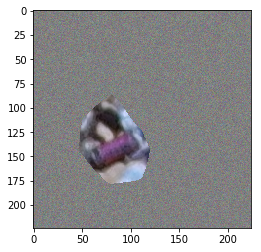

In [5]:
img = cv2.imread(bitmaskdir+onlyfiles[0])
img_masked = img[:,448:]
img_mask = img[:,224:448]
end_img = noise_image()*(img_mask<10)+img_masked*(img_mask>10)
show_rgb(end_img)

In [6]:
for file in onlyfiles:
    img = cv2.imread(bitmaskdir+file)
    img_masked = img[:,448:]
    img_mask = img[:,224:448]
    end_img = noise_image()*(img_mask<10)+img_masked*(img_mask>10)
    cv2.imwrite(outnoisedir+file,end_img)